## 安裝套件

In [1]:
!pip install requests

In [2]:
!pip install feedparser

In [3]:
!pip install lxml

In [4]:
!pip install jieba

### 下載繁體字的辭典檔

In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2021-11-26 21:39:44--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2021-11-26 21:39:45--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  13.0MB/s    in 0.6s    

2021-11-26 21:39:46 (13.0 MB/s) - ‘jieba_data/dict.txt.big’ saved [8583143/8583143]



In [6]:
!pip install wordcloud

## 解析 RSS

In [7]:
import feedparser

In [8]:
#rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [24]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money"

In [25]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '紐西蘭央行：通膨預期將是升息的關鍵',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '紐西蘭央行：通膨預期將是升息的關鍵'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/5599/5918262'}],
   'link': 'https://money.udn.com/money/story/5599/5918262',
   'published': 'Fri, 26 Nov 2021 21:20:33 +0800',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=11, tm_mday=26, tm_hour=13, tm_min=20, tm_sec=33, tm_wday=4, tm_yday=330, tm_isdst=0),
   'summary': '【彭博】-- 紐西蘭央行助理行長Christian Hawkesby表示，將密切關注通膨預期，以確定是否需要以更快的速度升息。「通膨預期對我們來說絕對是關鍵，」Hawkesby周五在威靈頓接受',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '【彭博】-- 紐西蘭央行助理行長Christian Hawkesby表示，將密切關注通膨預期，以確定是否需要以更快的速度升息。「通膨預期對我們來說絕對是關鍵，」Hawkesby周五在威靈頓接受'},
   'id': 'https

### 查看每個 entry 的 title, url 

In [26]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 紐西蘭央行：通膨預期將是升息的關鍵, https://money.udn.com/money/story/5599/5918262
2, 莫里森：澳大利亞正「密切監視」中國大陸的間諜船, https://money.udn.com/money/story/5599/5918601
3, 防新變異株入侵 亞洲國家加強入境管制, https://money.udn.com/money/story/5599/5919829
4, 拓展非洲商機  貿協與南非企業總會簽署備忘錄, https://money.udn.com/money/story/5599/5919831
5, 才協議加強取締非法捕撈 中國漁船又越界遭韓扣押, https://money.udn.com/money/story/5599/5919810
6, 新冠病毒新變體引憂 歐盟、英國暫停來自南非航班, https://money.udn.com/money/story/5599/5919353
7, 不是虛有其表 南非Nu新冠變異株將使醫藥大洗牌, https://money.udn.com/money/story/5599/5919730
8, 越南4人接種中國疫苗後死亡  清化省暫停施打, https://money.udn.com/money/story/5599/5919704
9, 南非新變異株掀市場恐慌 油價比特幣英鎊重挫, https://money.udn.com/money/story/5599/5919703
10, 澳防長示警北京拿下台灣後果 指中國將進一步擴權, https://money.udn.com/money/story/5599/5919692
11, 世衛召開專家會議 評估南非新變種病毒嚴重性, https://money.udn.com/money/story/5599/5919678
12, 全球憂通膨  唯亞洲靠這優勢成為例外, https://money.udn.com/money/story/5599/5919652
13, 北京冬奧面臨外交抵制 兩韓關係轉機恐成泡影, https://money.udn.com/money/story/5599/5919654
14, 美國與馬紹爾群島生嫌隙 擔心中國乘虛而入, https://money.udn.c

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [27]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [28]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [29]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [30]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/5599/5918262
sleep time: 8 sec
https://money.udn.com/money/story/5599/5918601
sleep time: 6 sec
https://money.udn.com/money/story/5599/5919829
sleep time: 5 sec
https://money.udn.com/money/story/5599/5919831
sleep time: 7 sec
https://money.udn.com/money/story/5599/5919810
sleep time: 9 sec
https://money.udn.com/money/story/5599/5919353
sleep time: 9 sec
https://money.udn.com/money/story/5599/5919730
sleep time: 9 sec
https://money.udn.com/money/story/5599/5919704
sleep time: 10 sec
https://money.udn.com/money/story/5599/5919703
sleep time: 10 sec
https://money.udn.com/money/story/5599/5919692
sleep time: 6 sec
https://money.udn.com/money/story/5599/5919678
sleep time: 7 sec
https://money.udn.com/money/story/5599/5919652
sleep time: 5 sec
https://money.udn.com/money/story/5599/5919654
sleep time: 5 sec
https://money.udn.com/money/story/5599/5919648
sleep time: 9 sec
https://money.udn.com/money/story/5599/5919617
sleep time: 8 sec
https://money.udn.com/m

'【彭博】-- 紐西蘭央行助理行長Christian Hawkesby表示，將密切關注通膨預期，以確定是否需要以更快的速度升息。「通膨預期對我們來說絕對是關鍵，」Hawkesby周五在威靈頓接受彭博電視採訪時表示。「有些事情可能會讓我們走得更快，我認為通膨預期就是其中之一。」【彭博】-- 澳大利亞總理斯科特·莫里森警告稱，在澳大利亞沿海曾有一艘中國大陸間諜船存在，表明「印度-太平洋局勢非常嚴峻」。據《每日電訊報》周五報導，這艘船舶被發現在8和9月份環繞澳大利亞海岸航行三周時間，收集軍事設施情報。在南非發現對疫苗可能具抗藥性的COVID-19（2019冠狀病毒疾病）變異病毒B.1.1.529後，亞洲國家急忙加強限制措施，新加坡和印度今天宣布邊境管制從嚴，並大力進行病毒篩檢。科學家還在對本週初才發現的新變異株進行更多研究，相關消息已重擊金融市場，其中亞股出現3個月來最大跌幅，油價也下挫逾3%。根據英國衛生安全局（UK Health SecurityAgency），波札那和香港也發現B.1.1.529的蹤跡。英國從今天開始，暫時禁止來自南非、納米比亞、波札那、辛巴威、賴索托和史瓦帝尼王國的班機入境，並要求從這些國家返英的英國公民接受隔離。新加坡迅速加入英國的行列，衛生部今天表示，將限制來自南非等非洲7國的人員入境或轉機。時事通信社報導，日本政府也決定對來自南非和其他非洲5國的人員加強邊境管制。印度中央政府本月稍早放寬部分入境限制後，如今對各省發出警示，要求對來自南非和其他「高風險」國家的外國人大力實施篩檢。台灣表示，來自非洲南部「高風險」國家的人員，必須入住集中檢疫所14天。紐西蘭總理阿爾登（Jacinda Ardern）告訴路透社，紐西蘭已為最新病毒變異株做好充分準備。本週稍早，紐西蘭才表示明年4月30日起，將開放完整接種疫苗的外國人入境。被問到這些計畫是否會因為新變異株而必須延後時，阿爾登表示，這些計畫原本就「內含一些措施，可充當保護層」。在駐南非代表處居間協調下，外貿協會、非洲經貿協會和南非聯合企業總會等三機構25日線上簽署2份合作備忘錄，以結合雙方產業互補性，進一步開拓商機。南非聯合企業總會（South African United BusinessConfederation，SAUBC）理事長塞布雷拉（GeorgeSebulela）、中華民國對外貿易發展協會秘書

### 做分詞

In [15]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from /home/jovyan/work/Text_wordcloud/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u240ff8c1e70462be159af457c3f6d652.cache
Loading model cost 0.983 seconds.
Prefix dict has been built successfully.


['美國',
 '5',
 '名',
 '國會議員',
 '無視',
 '中國',
 '警告',
 '，',
 '25',
 '日',
 '抵台',
 '訪問',
 '。',
 '民主',
 '黨籍',
 '聯邦',
 '眾',
 '議員',
 '絲拉金',
 '說',
 '，',
 '此行',
 '消息',
 '曝光',
 '後',
 '，',
 '辦公室',
 '就',
 '收到',
 '中國大使館',
 '的',
 '信',
 '，',
 '要',
 '她',
 '取消',
 '行程',
 '，',
 '以免',
 '傷害',
 '美中關係',
 '及',
 '台海',
 '穩定',
 '。',
 '密西根州',
 '選出',
 '的',
 '絲拉金',
 '（',
 'Elissa',
 ' ',
 'Slotkin',
 '）',
 '在',
 '推特',
 '（',
 'Twitter',
 '）',
 '寫道',
 '：',
 '「',
 '我們',
 '此行',
 '的',
 '消息',
 '昨天',
 '傳出',
 '後',
 '，',
 '我',
 '的',
 '辦公室',
 '就',
 '接獲',
 '中國大使館',
 '很',
 '不',
 '客氣',
 '的',
 '訊息',
 '，',
 '要',
 '我',
 '取消',
 '這趟',
 '行程',
 '。',
 '」',
 '她',
 '說',
 '：',
 '「',
 '汽車',
 '製造業',
 '所',
 '需',
 '晶片',
 '的',
 '最大',
 '供應商',
 '在',
 '台灣',
 '，',
 '所以',
 '供應鏈',
 '問題',
 '絕對',
 '會',
 '在',
 '議程',
 '中',
 '。',
 '」',
 '絲拉金',
 '的',
 '辦公室',
 '稍後',
 '向',
 '國家',
 '廣播公司',
 '新聞網',
 '（',
 'NBCNews',
 '）',
 '出示',
 '一份',
 '信件',
 '摘錄',
 '，',
 '據稱',
 '這',
 '封信',
 '是',
 '24',
 '日',
 '發自',
 '中國大使館',
 '。',
 '信中',
 '寫道',
 '：',
 '「',
 '我們',
 '強烈',
 '敦請',

In [16]:
!ls jieba_data

dict.txt.big  mydict.txt  stop_words.txt


### 準備 stop word

In [17]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '你',
 '我',
 '名',
 '，',
 '說',
 '不',
 '上',
 '人',
 '等',
 '會',
 '中',
 '但',
 '月',
 '閃',
 '為',
 '被',
 '']

### 準備一個利用stop word過濾後的分詞結果

In [18]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['美國',
 '5',
 '國會議員',
 '無視',
 '中國',
 '警告',
 '25',
 '抵台',
 '訪問',
 '民主',
 '黨籍',
 '聯邦',
 '眾',
 '議員',
 '絲拉金',
 '此行',
 '消息',
 '曝光',
 '後',
 '辦公室',
 '收到',
 '中國大使館',
 '信',
 '要',
 '她',
 '取消',
 '行程',
 '以免',
 '傷害',
 '美中關係',
 '台海',
 '穩定',
 '密西根州',
 '選出',
 '絲拉金',
 'Elissa',
 'Slotkin',
 '推特',
 'Twitter',
 '寫道',
 '此行',
 '消息',
 '昨天',
 '傳出',
 '後',
 '辦公室',
 '接獲',
 '中國大使館',
 '很',
 '客氣',
 '訊息',
 '要',
 '取消',
 '這趟',
 '行程',
 '她',
 '汽車',
 '製造業',
 '所',
 '需',
 '晶片',
 '最大',
 '供應商',
 '台灣',
 '所以',
 '供應鏈',
 '問題',
 '絕對',
 '議程',
 '絲拉金',
 '辦公室',
 '稍後',
 '向',
 '國家',
 '廣播公司',
 '新聞網',
 'NBCNews',
 '出示',
 '一份',
 '信件',
 '摘錄',
 '據稱',
 '這',
 '封信',
 '24',
 '發自',
 '中國大使館',
 '信中',
 '寫道',
 '強烈',
 '敦請',
 '議員',
 '立即',
 '取消',
 '原定',
 '造訪',
 '台灣',
 '計畫',
 '不要',
 '支持',
 '慫恿',
 '台灣',
 '獨立',
 '分裂',
 '勢力',
 '以免',
 '中美關係',
 '台灣',
 '海峽',
 '和平',
 '穩定',
 '造成',
 '巨大',
 '傷害',
 '中國大使館',
 '對此',
 '尚未',
 '置評',
 '美國',
 '兩黨',
 '組成',
 '國會議員',
 '代表團',
 '由',
 '民主',
 '黨籍',
 '眾院',
 '退伍軍人',
 '事務',
 '委員會',
 '主席',
 '高野',
 'Mark',
 'Takano',
 '率領',
 '成員',


### 載入繪圖相關的 library

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### 繪製文字雲 ( wordcloud.generate )

In [20]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [21]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'美國': 56,
         '5': 5,
         '名': 5,
         '國會議員': 2,
         '無視': 1,
         '中國': 45,
         '警告': 4,
         '，': 440,
         '25': 4,
         '日': 27,
         '抵台': 1,
         '訪問': 3,
         '。': 199,
         '民主': 11,
         '黨籍': 5,
         '聯邦': 2,
         '眾': 2,
         '議員': 2,
         '絲拉金': 4,
         '說': 24,
         '此行': 2,
         '消息': 3,
         '曝光': 2,
         '後': 14,
         '辦公室': 3,
         '就': 11,
         '收到': 1,
         '中國大使館': 4,
         '的': 200,
         '信': 1,
         '要': 8,
         '她': 4,
         '取消': 3,
         '行程': 2,
         '以免': 3,
         '傷害': 4,
         '美中關係': 2,
         '及': 9,
         '台海': 1,
         '穩定': 8,
         '密西根州': 1,
         '選出': 1,
         '（': 73,
         'Elissa': 1,
         ' ': 60,
         'Slotkin': 1,
         '）': 72,
         '在': 76,
         '推特': 3,
         'Twitter': 1,
         '寫道': 2,
         '：': 20,
         '「': 69,
         '我們': 17,
   

In [22]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

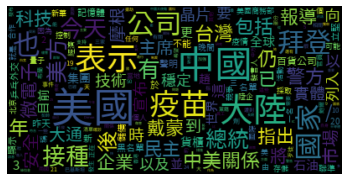

In [23]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()